In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/countries-of-the-world/countries of the world.csv


In [2]:
data=pd.read_csv('../input/countries-of-the-world/countries of the world.csv')

### Assessing data

In [3]:
data.shape

(227, 20)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         224 non-null object
Infant mortality (per 1000 births)    224 non-null object
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null object
Phones (per 1000)                     223 non-null object
Arable (%)                            225 non-null object
Crops (%)                             225 non-null object
Other (%)                             225 non-null object
Climate                               205 non-null object
Birthrate                 

In [5]:
data.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [6]:
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


### Data Wrangling

### Making a copy of the dataset

In [7]:
df=data.copy()

In [8]:
df=df.fillna(0)

In [9]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

### Replacing all decimal values with decimal point instead of commas and changing data type from str to float

### Code

In [10]:
cols = df[['Pop. Density (per sq. mi.)' , 'Coastline (coast/area ratio)' , 'Net migration' , 'Infant mortality (per 1000 births)' , 
                   'Literacy (%)' , 'Phones (per 1000)' , 'Arable (%)' , 'Crops (%)' , 'Other (%)' , 'Climate' , 'Birthrate' , 'Deathrate' , 'Agriculture' ,
                   'Industry' , 'Service']]
def rectify(cols):
    for i in cols:
        df[i] = df[i].astype(str)
        new_col = []
        for val in df[i]:
            val = val.replace(',','.')
            val = float(val)
            new_col.append(val)

        
        df[i] = new_col


rectify(cols)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null float64
Coastline (coast/area ratio)          227 non-null float64
Net migration                         227 non-null float64
Infant mortality (per 1000 births)    227 non-null float64
GDP ($ per capita)                    227 non-null float64
Literacy (%)                          227 non-null float64
Phones (per 1000)                     227 non-null float64
Arable (%)                            227 non-null float64
Crops (%)                             227 non-null float64
Other (%)                             227 non-null float64
Climate                               227 non-null float64
Birthrate       

In [12]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000


### Test

In [13]:
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,0.0,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,0.00,0.00,0.0,0.0,0.0,0.02,0.00,99.98,1.0,0.00,0.00,0.000,0.000,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


### Dropping the 'Other (%)' Column as no inferences can be drawn

In [14]:
df=df.drop(columns=['Other (%)'])

### Exploratory Data Analysis

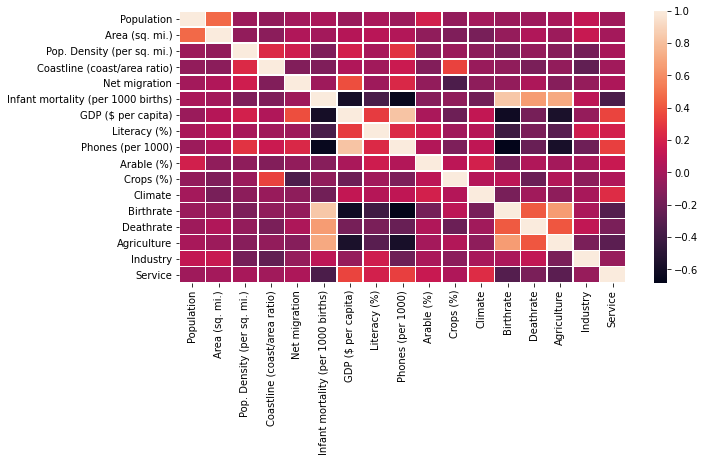

In [15]:
plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(),linewidth=0.5)
plt.show()

The follwing have high negative correlation:
1. GDP and Infant mortality
2. Phones and infant mortality
3. Birthrate and GDP
4. Agriculture and GDP
5. Other and Arable
6. Phones and Birthrate
7. Agriculture and Phones

### The follwing have high positive correlation:
1. Birthrate and Infant mortality
2. Phones and GDP
3. Agriculture and Birthrate
4. Infant mortality and agriculture
5. Infant mortality and death rate


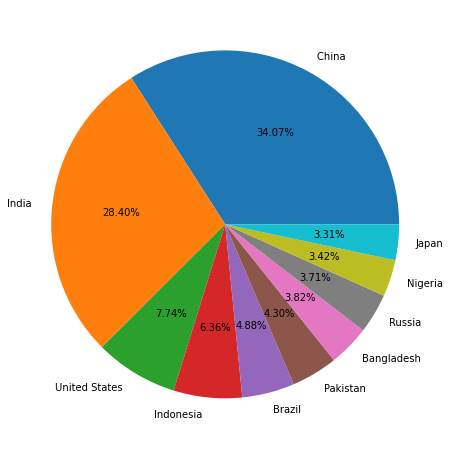

In [16]:
plt.subplots(figsize=(8,8))
df1=df.sort_values('Population',ascending=False).head(10)
plt.pie('Population', labels='Country', autopct="%0.2f%%",data=df1)
plt.show()

### Inferences drawn:
The most populated Country is China followed by India and United States

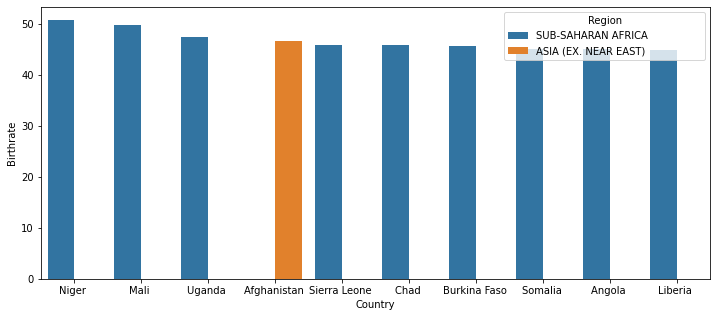

In [17]:
plt.subplots(figsize=(12,5))
df4=df.sort_values('Birthrate',ascending=False).head(10)
sns.barplot(x='Country',y='Birthrate',hue='Region',data=df4)
plt.show()

### The birthrate is maximum for Niger followed by Mail and Uganda

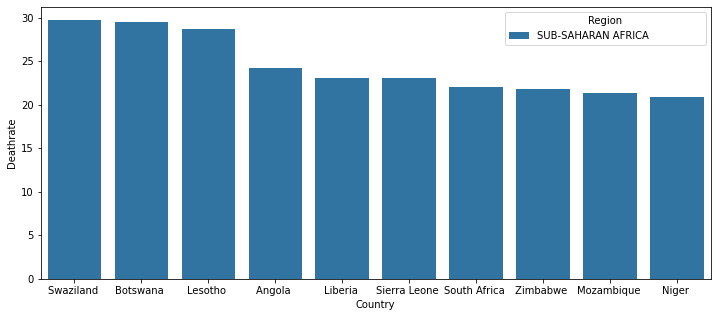

In [18]:
plt.subplots(figsize=(12,5))
df5=df.sort_values('Deathrate',ascending=False).head(10)
sns.barplot(x='Country',y='Deathrate',hue='Region',data=df5)
plt.show()

### The Deathrate is maximum for Swaziland followed by Botswana and Lesotho

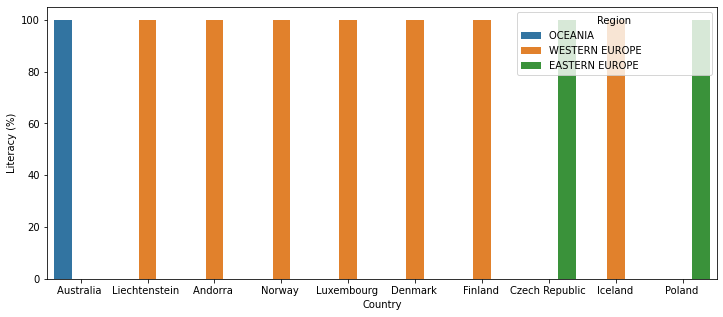

In [19]:
plt.subplots(figsize=(12,5))
df6=df.sort_values('Literacy (%)',ascending=False).head(10)
sns.barplot(x='Country',y='Literacy (%)',hue='Region',data=df6)
plt.show()

### The Literacy percentage is maximum for Austraila followed by Liechtenstein and Andorra







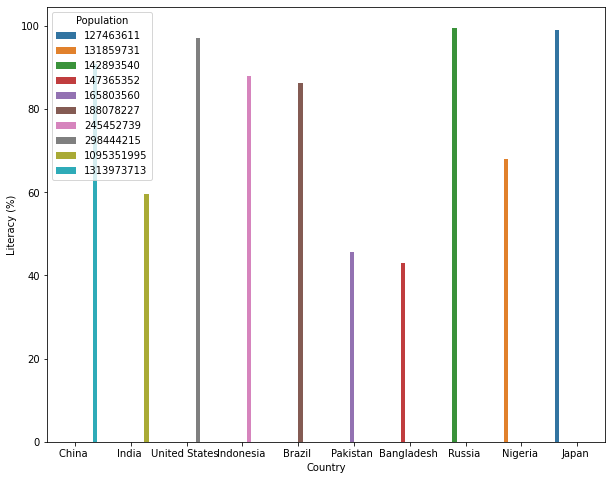

In [20]:
plt.subplots(figsize=(10,8))
df_new=df.sort_values('Population',ascending=False).head(10)
sns.barplot(x='Country', y='Literacy (%)', hue='Population',data=df_new)
plt.show()

### Inspite of being among the top 10 populated countries, Pakistan and Bangladesh have a literacy percentage of about 45%.

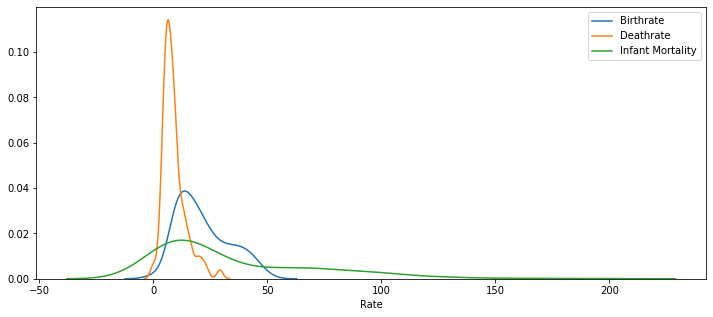

In [21]:
plt.subplots(figsize=(12,5))
sns.distplot(df['Birthrate'],hist=False,label='Birthrate')
sns.distplot(df['Deathrate'],hist=False, label='Deathrate')
sns.distplot(df['Infant mortality (per 1000 births)'],hist=False, label='Infant Mortality')
plt.xlabel('Rate')
plt.show()

### The probability of 0-20 deaths per 1000 people of population is maximum whereas the probability of 20-60 births per 1000 people of population is maximum.

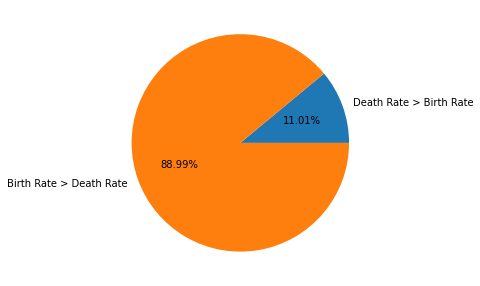

In [22]:
plt.subplots(figsize=(5,5))
df7=df[df['Deathrate']>df['Birthrate']].shape[0]
plt.pie([df7,(df.shape[0]-df7)],labels=['Death Rate > Birth Rate','Birth Rate > Death Rate'],autopct="%0.2f%%")
plt.show()

### About 11% of the population have Death Rate>Birth Rate

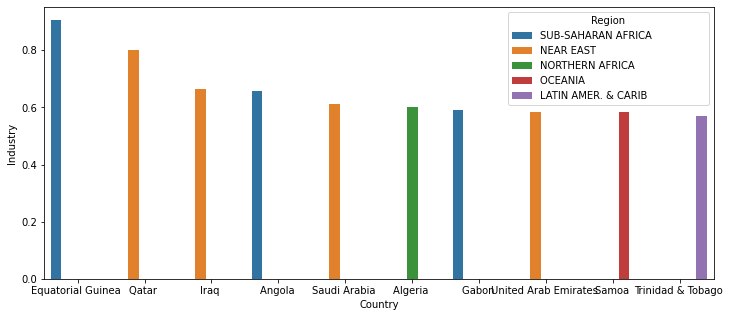

In [23]:
plt.subplots(figsize=(12,5))
df3=df.sort_values('Industry',ascending=False).head(10)
sns.barplot(x='Country',y='Industry',hue='Region',data=df3)
plt.show()

### Equatorial Guinea has maximum Industry followed by Qatar and Iraq

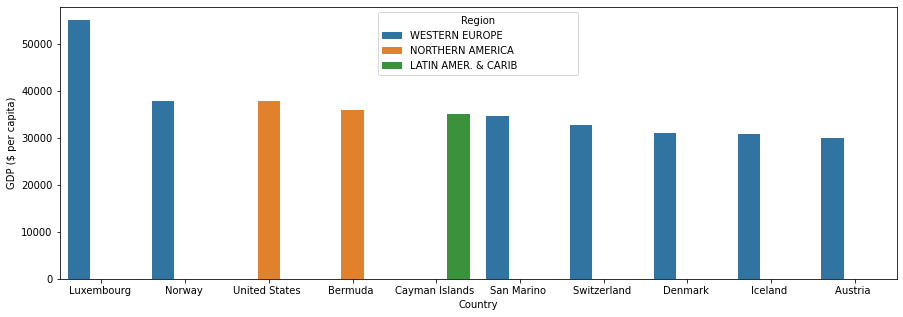

In [24]:
plt.subplots(figsize=(15,5))
df2=df.sort_values('GDP ($ per capita)',ascending=False).head(10)
sns.barplot(x='Country',y='GDP ($ per capita)',hue='Region',data=df2)
plt.show()

### Luxembourg has the highest GDP followed by Norway and United States

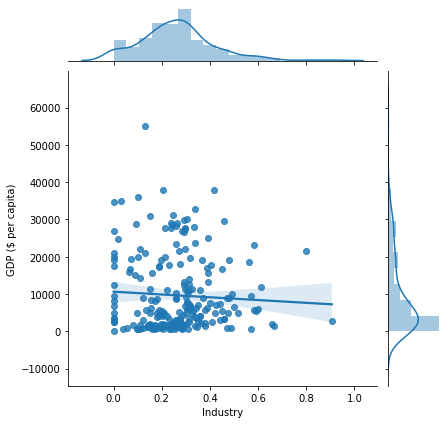

In [25]:
sns.jointplot(x='Industry',y='GDP ($ per capita)',kind='reg',data=df)
plt.show()


### Shockingly,GDP has poor correlation with Industry. The GDP seems to be almost constant with the increase in Industry.

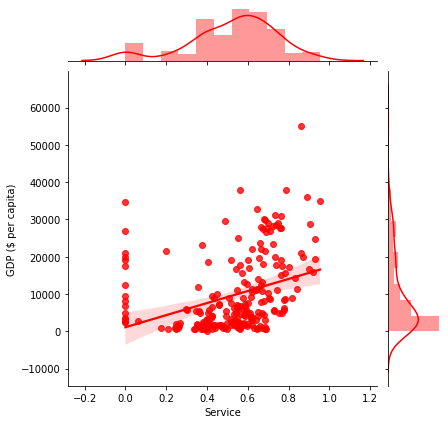

In [26]:
sns.jointplot(x='Service',y='GDP ($ per capita)',kind='reg',color='r',data=df)
plt.show()

### Here we see that the growth of GDP is very slow with the increase in services.

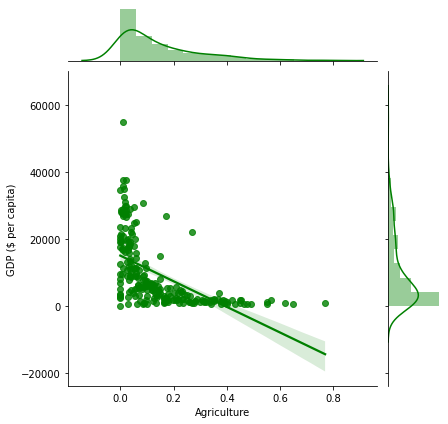

In [27]:
sns.jointplot(x='Agriculture',y='GDP ($ per capita)',kind='reg',data=df,color='g')
plt.show()

### Astonishingly, Agriculture shows high negative correlation with GDP.

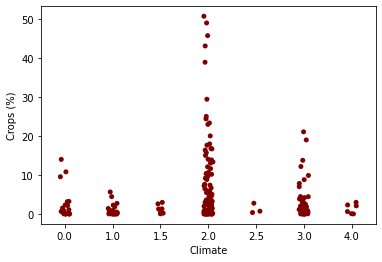

In [28]:
sns.stripplot(x='Climate',y='Crops (%)',data=df,color='maroon')
plt.show()

### Climate 2 is favourable for crops

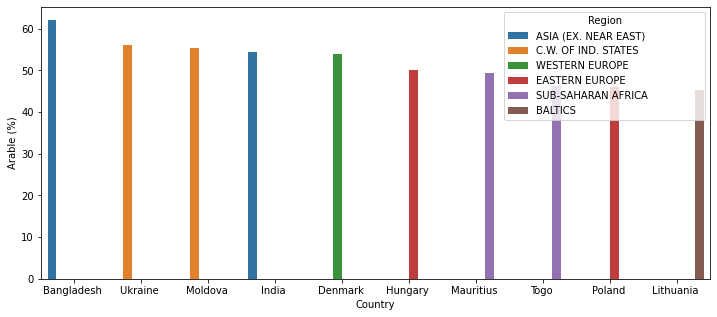

In [29]:
plt.subplots(figsize=(12,5))
df9=df.sort_values('Arable (%)',ascending=False).head(10)
sns.barplot(x='Country',y='Arable (%)',hue='Region',data=df9)
plt.show()

### Bangladesh has maximum arable land followed by Ukraine and Moldova

### Conclusion:
1. The most populated Country is China followed by India and United States.
2. The birthrate is maximum for Niger followed by Mail and Uganda.
3. The Deathrate is maximum for Swaziland followed by Botswana and Lesotho.
4. The Literacy percentage is maximum for Austraila followed by Liechtenstein and Andorra.However, inspite of being 
   among the top 10 populated countries, Pakistan and Bangladesh have a literacy percentage of about 45%.
5. About 11% of the population have Death Rate>Birth Rate.The probability of 0-20 deaths per 1000 people of population 
   is maximum whereas the probability of 20-60 births per 1000 people of population is maximum.
6. Equatorial Guinea has maximum Industry followed by Qatar and Iraq.
7. Luxembourg has the highest GDP followed by Norway and United States.
8. Shockingly,GDP has poor correlation with Industry. The GDP seems to be almost constant with the increase in
   Industry.
9. The growth of GDP is very slow with the increase in Services.
10. Astonishingly, Agriculture shows high negative correlation with GDP.
11. Climate 2 is favourable for crops.
12. Bangladesh has maximum arable land followed by Ukraine and Moldova.







